# Homework 1

Load and validate GSS data

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [26]:
%matplotlib inline

In [27]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf

## Loading and validation


In [28]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss

Read the variables I selected from the GSS dataset.  You can look up these variables at https://gssdataexplorer.norc.org/variables/vfilter

In [29]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [30]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

C:\Users\champ\AppData\Local\Temp\ipykernel_22348\2044141573.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.realinc.replace([0], np.nan, inplace=True)
C:\Users\champ\AppData\Local\Temp\ipykernel_22348\2044141573.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Here are summary statistics for the variables I have validated and cleaned.

In [31]:
gss['year'].describe()

count    62466.000000
mean      1994.072359
std         12.937941
min       1972.000000
25%       1984.000000
50%       1994.000000
75%       2006.000000
max       2016.000000
Name: year, dtype: float64

In [32]:
gss['sex'].describe()

count    62466.000000
mean         1.558768
std          0.496538
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sex, dtype: float64

In [33]:
gss['age'].describe()

count    62245.000000
mean        45.991341
std         17.505563
min         18.000000
25%         31.000000
50%         44.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64

In [34]:
gss['cohort'].describe()

count    62245.000000
mean      1948.087075
std         20.998696
min       1883.000000
25%       1934.000000
50%       1950.000000
75%       1963.000000
max       1998.000000
Name: cohort, dtype: float64

In [9]:
gss['race'].describe()

count    62466.000000
mean         1.247335
std          0.540917
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: race, dtype: float64

In [10]:
gss['educ'].describe()

count    62292.000000
mean        12.837234
std          3.179130
min          0.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         20.000000
Name: educ, dtype: float64

In [11]:
gss['realinc'].describe()

count     56141.000000
mean      31636.199666
std       29402.370825
min         234.000000
25%       12080.625000
50%       24097.500000
75%       39022.500000
max      162607.000000
Name: realinc, dtype: float64

In [12]:
gss['wtssall'].describe()

count    62466.000000
mean         1.000016
std          0.461927
min          0.391825
25%          0.550100
50%          0.988100
75%          1.098500
max          8.739876
Name: wtssall, dtype: float64

**Exercise** 

1. Look through the column headings to find a few variables that look interesting.  Look them up on the GSS data explorer.  

2. Use `value_counts` to see what values appear in the dataset, and compare the results with the counts in the code book.  

3. Identify special values that indicate missing data and replace them with `NaN`.

4. Use `describe` to compute summary statistics.  What do you notice?

## Visualize distributions

Let's visualize the distributions of the variables we've selected.

Here's a Hist of the values in `educ`:

In [45]:
import numpy as np

# Replace -1, 999, 0 with NaN in the 'educ' column (assuming these are special values indicating missing data)
gss['educ'] = gss['educ'].replace([-1, 999, 0], np.nan)

# You can also do this for other columns if needed
gss['realinc'] = gss['realinc'].replace([-1, 999, 0], np.nan)

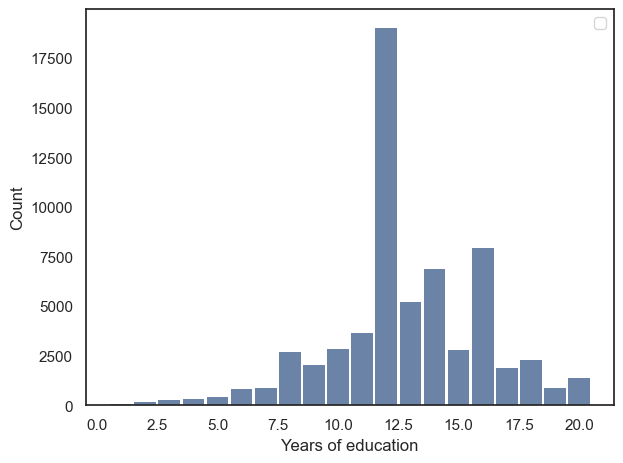

educ
12.0    19006
16.0     7925
14.0     6847
13.0     5177
11.0     3648
10.0     2815
15.0     2783
8.0      2689
18.0     2265
9.0      2032
17.0     1870
20.0     1367
19.0      875
7.0       871
6.0       808
5.0       399
4.0       314
3.0       247
2.0       148
1.0        45
Name: count, dtype: int64

New Line
realinc
25582.50    394
38373.75    360
32761.00    348
27793.00    345
31267.50    332
           ... 
528.00       10
2409.75       9
2695.00       8
2331.00       8
444.00        6
Name: count, Length: 597, dtype: int64
Education Summary:
count    62131.000000
mean        12.870499
std          3.115270
min          1.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         20.000000
Name: educ, dtype: float64

Income Summary:
count     56141.000000
mean      31636.199666
std       29402.370825
min         234.000000
25%       12080.625000
50%       24097.500000
75%       39022.500000
max      162607.000000
Name: realinc, dtype: float64


In [49]:
from thinkstats2 import Hist, Pmf, Cdf
import thinkplot

hist_educ = Hist(gss.educ)
thinkplot.hist(hist_educ)
decorate(xlabel='Years of education', 
         ylabel='Count')
plt.show()

educ_counts = gss['educ'].value_counts()
print(educ_counts)

print("\nNew Line")

realinc_counts = gss['realinc'].value_counts()
print(realinc_counts)



# Compute summary statistics for 'educ' and 'realinc'
educ_desc = gss['educ'].describe()
realinc_desc = gss['realinc'].describe()

print("Education Summary:")
print(educ_desc)

print("\nIncome Summary:")
print(realinc_desc)

`Hist` as defined in `thinkstats2` is different from `hist` as defined in Matplotlib.  The difference is that `Hist` keeps all unique values and does not put them in bins.  Also, `hist` does not handle `NaN`.

One of the hazards of using `hist` is that the shape of the result depends on the bin size.

**Exercise:** 

1. Run the following cell and compare the result to the `Hist` above.

2. Add the keyword argument `bins=11` to `plt.hist` and see how it changes the results.

3. Experiment with other numbers of bins.

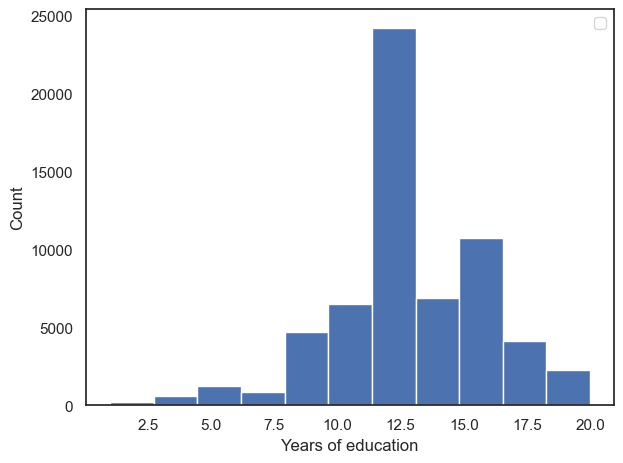

In [54]:
import matplotlib.pyplot as plt

# Create histogram with 11 bins
plt.hist(gss.educ.dropna(), bins=11)

# Add labels to the axes
decorate(xlabel='Years of education', ylabel='Count')

# Show the plot
plt.show()

However, a drawback of `Hist` and `Pmf` is that they basically don't work when the number of unique values is large, as in this example:

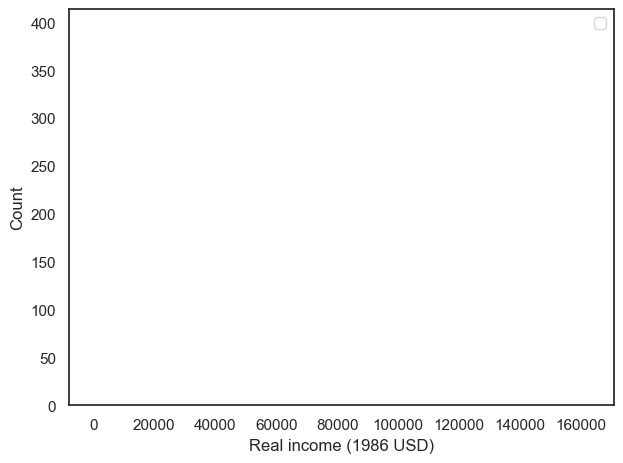

In [55]:
hist_realinc = Hist(gss.realinc)
thinkplot.hist(hist_realinc)
decorate(xlabel='Real income (1986 USD)', 
         ylabel='Count')
plt.show()

**Exercise:**
    
1. Make and plot a `Hist` of `age`.

2. Make and plot a `Pmf` of `educ`.

3. What fraction of people have 12, 14, and 16 years of education?

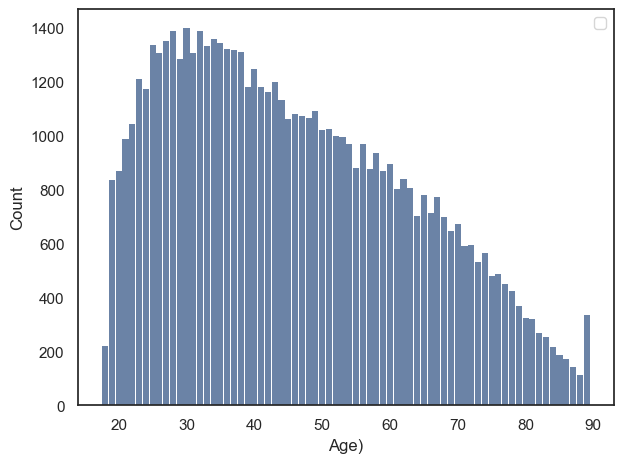

In [64]:
# Solution goes here
hist_age = Hist(gss.age)
thinkplot.hist(hist_age)
decorate(xlabel='Age)', 
         ylabel='Count')
plt.show()


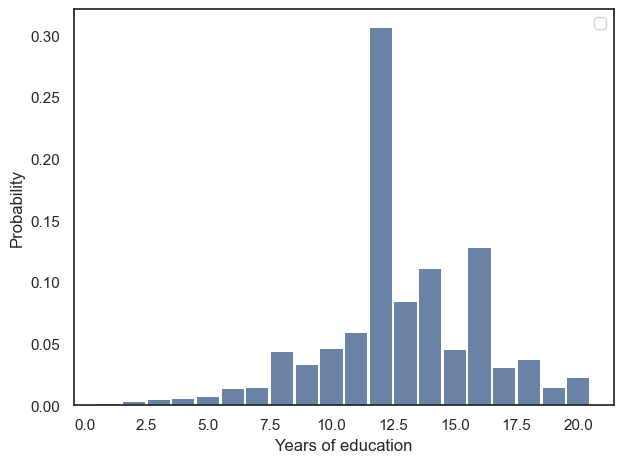

In [65]:
# Solution goes here
# Create a Pmf from the 'educ' column, dropping missing values
educ_pmf = Pmf(gss['educ'].dropna())

# Plot the Pmf
thinkplot.Hist(educ_pmf)
decorate(xlabel='Years of education', ylabel='Probability')
plt.show()

In [66]:
# Solution goes here
# Get the value counts for the 'educ' column
educ_counts = gss['educ'].dropna().value_counts()

# Total number of entries
total_count = len(gss['educ'].dropna())

# Get the count for 12, 14, and 16 years of education
count_12 = educ_counts.get(12, 0)
count_14 = educ_counts.get(14, 0)
count_16 = educ_counts.get(16, 0)

# Compute the fraction for each value
fraction_12 = count_12 / total_count
fraction_14 = count_14 / total_count
fraction_16 = count_16 / total_count

# Print the results
print(f"Fraction with 12 years of education: {fraction_12:.4f}")
print(f"Fraction with 14 years of education: {fraction_14:.4f}")
print(f"Fraction with 16 years of education: {fraction_16:.4f}")

Fraction with 12 years of education: 0.3059
Fraction with 14 years of education: 0.1102
Fraction with 16 years of education: 0.1276


In [19]:
# Solution goes here

In [20]:
# Solution goes here

**Exercise:**
    
1. Make and plot a `Cdf` of `educ`.

2. What fraction of people have more than 12 years of education?

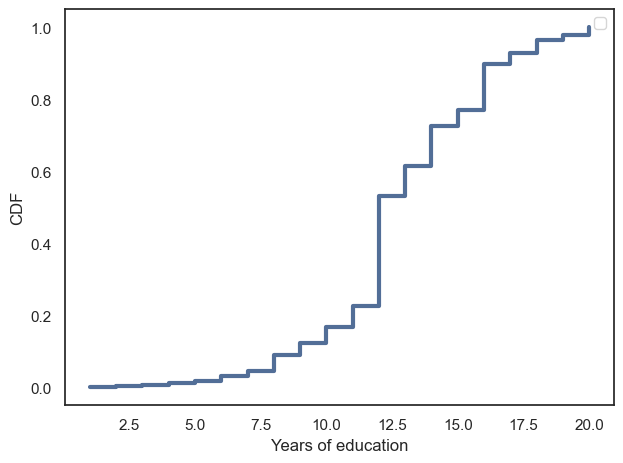

In [67]:
# Solution goes here
from thinkstats2 import Cdf
import thinkplot

# Create a Cdf from the 'educ' column, dropping missing values
educ_cdf = Cdf(gss['educ'].dropna())

# Plot the Cdf
thinkplot.Cdf(educ_cdf)
decorate(xlabel='Years of education', ylabel='CDF')
plt.show()

In [68]:
# Solution goes here
# Count the number of people with more than 12 years of education
more_than_12 = (gss['educ'] > 12).sum()

# Total number of entries (non-missing)
total_count = len(gss['educ'].dropna())

# Compute the fraction
fraction_more_than_12 = more_than_12 / total_count

# Print the result
print(f"Fraction of people with more than 12 years of education: {fraction_more_than_12:.4f}")

Fraction of people with more than 12 years of education: 0.4685


In [23]:
# Solution goes here

**Exercise:**
    
1. Make and plot a `Cdf` of `age`.

2. What is the median age?  What is the inter-quartile range (IQR)?

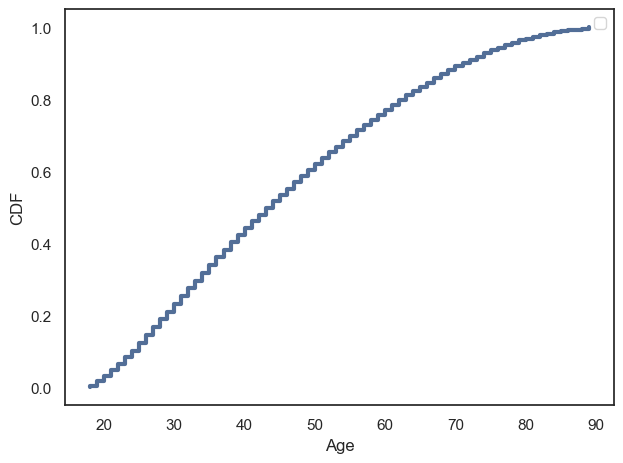

In [ ]:
# Solution goes here
from thinkstats2 import Cdf
import thinkplot

# Create a Cdf from the 'educ' column, dropping missing values
age_cdf = Cdf(gss['age'].dropna())

# Plot the Cdf
thinkplot.Cdf(age_cdf)
decorate(xlabel='Age', ylabel='CDF')
plt.show()

In [71]:
# Solution goes here
# Drop missing values from 'age' column
age_data = gss['age'].dropna()

# Calculate the median
median_age = age_data.median()

# Calculate the IQR (Q3 - Q1)
iqr = age_data.quantile(0.75) - age_data.quantile(0.25)

# Print the results
print(f"Median age: {median_age}")
print(f"Inter-quartile range (IQR) of age: {iqr}")

Median age: 44.0
Inter-quartile range (IQR) of age: 28.0


In [26]:
# Solution goes here

**Exercise:**

Find another numerical variable, plot a histogram, PMF, and CDF, and compute any statistics of interest.

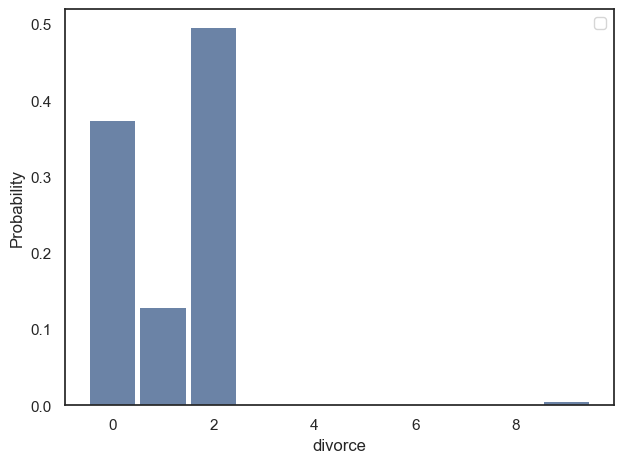

In [73]:
divorce_pmf = Pmf(gss['divorce'].dropna())

# Plot the Pmf
thinkplot.Hist(divorce_pmf)
decorate(xlabel='divorce', ylabel='Probability')
plt.show()

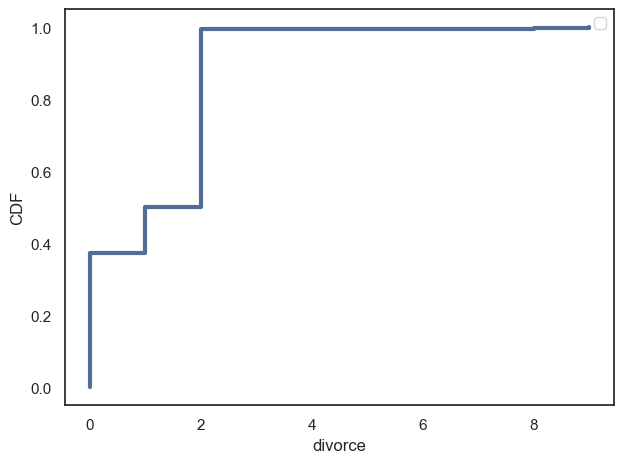

In [74]:
# Solution goes here
from thinkstats2 import Cdf
import thinkplot

divorce_cdf = Cdf(gss['divorce'].dropna())

# Plot the Cdf
thinkplot.Cdf(divorce_cdf)
decorate(xlabel='divorce', ylabel='CDF')
plt.show()

In [75]:
# Solution goes here
divorce_desc = gss['divorce'].describe()

print("Divorce Summary:")
print(divorce_desc)

Divorce Summary:
count    62466.000000
mean         1.154804
std          1.052934
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: divorce, dtype: float64


In [30]:
# Solution goes here

**Exercise:**

1. Compute the CDF of `realinc` for male and female respondents, and plot both CDFs on the same axes.

2. What is the difference in median income between the two groups?

In [79]:
males = gss[gss['sex'] == '1']

# Create the Cdf for 'realinc' for males only
realinc_cdf_males = Cdf(males['realinc'].dropna())

# Plot the Cdf
thinkplot.Cdf(realinc_cdf_males)
decorate(xlabel='Real income (1986 USD)', ylabel='CDF')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [32]:
# Solution goes here

In [80]:
# Solution goes here

Index(['year', 'id_', 'agewed', 'divorce', 'sibs', 'childs', 'age', 'educ',
       'paeduc', 'maeduc',
       ...
       'memchurh', 'realinc', 'cohort', 'marcohrt', 'ballot', 'wtssall',
       'adults', 'compuse', 'databank', 'wtssnr'],
      dtype='object', length=101)


In [34]:
# Solution goes here

**Exercise:**

Use a variable to break the dataset into groups and plot multiple CDFs to compare distribution of something within groups.

Note: Try to find something interesting, but be cautious about overinterpreting the results.  Between any two groups, there are often many differences, with many possible causes.

In [35]:
# Solution goes here

In [36]:
# Solution goes here

In [37]:
# Solution goes here

In [38]:
# Solution goes here

## Save the cleaned data

Now that we have the data in good shape, we'll save it in a binary format (HDF5), which will make it faster to load later.

Also, we have to do some resampling to make the results representative.  We'll talk about this in class.

In [39]:
np.random.seed(19)
sample = utils.resample_by_year(gss, 'wtssall')

Save the file.

In [40]:
!rm gss.hdf5
sample.to_hdf('gss.hdf5', 'gss')

Load it and see how fast it is!

In [41]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape